In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt  # To visualize
import pandas as pd  # To read data
from sklearn.linear_model import LinearRegression


df_listing = pd.read_csv("../../raw_data/sfo/listings-1.csv")
df_transit = pd.read_csv("data/sfo_distance.csv")

#### Check imported data

In [2]:
df_listing.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,958,https://www.airbnb.com/rooms/958,20200815122856,2020-08-15,"Bright, Modern Garden Unit - 1BR/1BTH",Cleaning Protocol: Our cleaners follow the Air...,Quiet cul de sac in friendly neighborhood<br /...,https://a0.muscache.com/pictures/b7c2a199-4c17...,1169,https://www.airbnb.com/users/show/1169,...,10.0,10.0,10.0,STR-0001256,f,1,1,0,0,1.91
1,5858,https://www.airbnb.com/rooms/5858,20200815122856,2020-08-15,Creative Sanctuary,<b>The space</b><br />We live in a large Victo...,I love how our neighborhood feels quiet but is...,https://a0.muscache.com/pictures/17714/3a7aea1...,8904,https://www.airbnb.com/users/show/8904,...,10.0,10.0,9.0,NaN,f,1,1,0,0,0.81
2,7918,https://www.airbnb.com/rooms/7918,20200815122856,2020-08-15,A Friendly Room - UCSF/USF - San Francisco,Nice and good public transportation. 7 minute...,"Shopping old town, restaurants, McDonald, Whol...",https://a0.muscache.com/pictures/26356/8030652...,21994,https://www.airbnb.com/users/show/21994,...,9.0,9.0,8.0,NaN,f,9,0,9,0,0.14
3,8142,https://www.airbnb.com/rooms/8142,20200815122856,2020-08-15,Friendly Room Apt. Style -UCSF/USF - San Franc...,Nice and good public transportation. 7 minute...,NaN,https://a0.muscache.com/pictures/27832/3b1f9e5...,21994,https://www.airbnb.com/users/show/21994,...,10.0,9.0,9.0,NaN,f,9,0,9,0,0.11
4,8339,https://www.airbnb.com/rooms/8339,20200815122856,2020-08-15,Historic Alamo Square Victorian,Pls email before booking. <br />Interior featu...,NaN,https://a0.muscache.com/pictures/213fbf05-3545...,24215,https://www.airbnb.com/users/show/24215,...,10.0,10.0,10.0,STR-0000264,f,2,2,0,0,0.21


#### Merge Dataset and fix data type

In [3]:
df = pd.merge(df_transit, df_listing, on="id")
df["price"] = df.price.str.replace('$','')
df["price"].replace(',','', regex=True, inplace=True)
df["price"] = df["price"].astype(float)

df_filtered = df[["distance", "duration", "price", "accommodates", "neighbourhood_cleansed", "property_type"]]
df_filtered.head()

,distance,duration,price,accommodates,neighbourhood_cleansed,property_type
0,14,3,132.0,3,Western Addition,Entire apartment
1,366,91,235.0,5,Bernal Heights,Entire apartment
2,45,8,56.0,2,Haight Ashbury,Private room in apartment
3,45,8,56.0,2,Haight Ashbury,Private room in apartment
4,102,27,750.0,4,Western Addition,Entire condominium


#### Create a base visualization

In [19]:
plotdata = df_filtered[(df["property_type"] == "Entire apartment")&(df["distance"] < 2000)&(df["price"]<150)]
plotdata = plotdata[(plotdata["accommodates"] > 2)]
plotdata.head()

# for x in plotdata["neighbourhood_cleansed"].unique():
#     temp = plotdata[plotdata["neighbourhood_cleansed"] == x]
#     sns.relplot(data=temp, x="price", y="distance")


,distance,duration,price,accommodates,neighbourhood_cleansed,property_type
0,14,3,132.0,3,Western Addition,Entire apartment
16,257,52,107.0,3,Noe Valley,Entire apartment
50,316,92,149.0,4,Downtown/Civic Center,Entire apartment
53,117,34,112.0,4,Outer Richmond,Entire apartment
54,19,3,99.0,4,Twin Peaks,Entire apartment


#### Convert Categorical to number

In [22]:
df["neighbourhood_cleansed"] = df["neighbourhood_cleansed"].astype('category')
df["neighbourhood_cat"] = df["neighbourhood_cleansed"].cat.codes
df.head()

,id,distance,duration,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,...,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,neighbourhood_cat
0,958,14,3,https://www.airbnb.com/rooms/958,20200815122856,2020-08-15,"Bright, Modern Garden Unit - 1BR/1BTH",Cleaning Protocol: Our cleaners follow the Air...,Quiet cul de sac in friendly neighborhood<br /...,https://a0.muscache.com/pictures/b7c2a199-4c17...,...,10.0,10.0,STR-0001256,f,1,1,0,0,1.91,36
1,5858,366,91,https://www.airbnb.com/rooms/5858,20200815122856,2020-08-15,Creative Sanctuary,<b>The space</b><br />We live in a large Victo...,I love how our neighborhood feels quiet but is...,https://a0.muscache.com/pictures/17714/3a7aea1...,...,10.0,9.0,NaN,f,1,1,0,0,0.81,1
2,7918,45,8,https://www.airbnb.com/rooms/7918,20200815122856,2020-08-15,A Friendly Room - UCSF/USF - San Francisco,Nice and good public transportation. 7 minute...,"Shopping old town, restaurants, McDonald, Whol...",https://a0.muscache.com/pictures/26356/8030652...,...,9.0,8.0,NaN,f,9,0,9,0,0.14,11
3,8142,45,8,https://www.airbnb.com/rooms/8142,20200815122856,2020-08-15,Friendly Room Apt. Style -UCSF/USF - San Franc...,Nice and good public transportation. 7 minute...,NaN,https://a0.muscache.com/pictures/27832/3b1f9e5...,...,9.0,9.0,NaN,f,9,0,9,0,0.11,11
4,8339,102,27,https://www.airbnb.com/rooms/8339,20200815122856,2020-08-15,Historic Alamo Square Victorian,Pls email before booking. <br />Interior featu...,NaN,https://a0.muscache.com/pictures/213fbf05-3545...,...,10.0,10.0,STR-0000264,f,2,2,0,0,0.21,36


,neighbourhood_cat,distance,accommodates,price
0,36,14,3,132.0
1,1,366,5,235.0
2,11,45,2,56.0
3,11,45,2,56.0
4,36,102,4,750.0
...,...,...,...,...
6835,33,22,6,182.0
6836,0,193,2,45.0
6837,33,266,4,276.0
6838,20,585,1,33.0


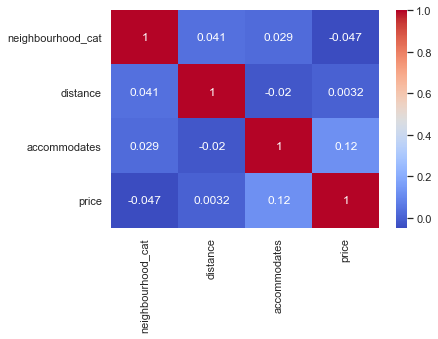

In [46]:
# calculate corr
corr = df[['neighbourhood_cat', 'distance', 'accommodates', 'price']].corr()

sns.heatmap(corr, annot = True, cmap='coolwarm')

#### MLR

In [40]:
from sklearn import linear_model
import statsmodels.api as sm


X = df[['neighbourhood_cat', 'distance', 'accommodates']] # here we have 3 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.50, random_state = 1234)
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
Y_pred = regr.predict(X_test) 

print("RMSE:", (np.sqrt(mean_squared_error(y_test, Y_pred))))
print("R2:", r2_score(y_test, Y_pred))
print('Intercept:', regr.intercept_)
print('Coefficients:', regr.coef_)

RMSE: 861.7877443141367
R2: 0.0063074489509911125
Intercept: 84.71532644519468
Coefficients: [-2.03706917e+00  9.03916636e-03  5.59779748e+01]


#### Split Data

In [5]:
from sklearn.model_selection import train_test_split

Y = plotdata["price"].values.reshape(-1, 1)
X = plotdata["distance"].values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.50, random_state = 1234)

#### LinearRegression

In [6]:
regr = LinearRegression()  # create object for the class
regr.fit(X_train, y_train) # perform linear regression
Y_pred = regr.predict(X_test)  # make predictions

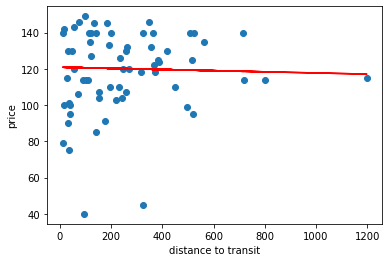

In [7]:
plt.scatter(X_test,y_test)
plt.plot(X_test, Y_pred, color='red')
plt.xlabel('distance to transit')
plt.ylabel('price')
plt.show()

#### Regression Values

In [8]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
# The coefficients
print('Coefficients:', regr.coef_[0][0])
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, Y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, Y_pred))

Coefficients: -0.0031631517659482192
Mean squared error: 509.35
Coefficient of determination: -0.01


#### LOGISTIC REGRESSION

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn import utils
from sklearn import metrics
from sklearn.metrics import accuracy_score

lab_enc = preprocessing.LabelEncoder()
Y = lab_enc.fit_transform(plotdata["price"])
X = lab_enc.fit_transform(plotdata["distance"]).reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.50, random_state = 1234)



# Train model
clf_lg = LogisticRegression()  
clf_lg.fit(X_train, y_train)

lg_predictions = clf_lg.predict(X_test)
lg_results_df = pd.DataFrame({'Actual': y_test, 'Predicted': lg_predictions})
lg_results_df.sample(10)

/Users/Ansley/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Actual,Predicted
6,45,41
59,1,41
41,41,41
49,18,41
13,43,41
0,25,36
12,41,27
25,30,35
17,38,41
27,24,27


In [10]:
# Accuracy
lg_accuracy = accuracy_score(y_test,lg_predictions)
print("Accuracy:", lg_accuracy)

Accuracy: 0.09090909090909091
